In [95]:
!pip install --upgrade --no-cache-dir gdown > /dev/null

In [96]:
!gdown --id 1PFFxswC-YFz5UwWytak1JA40Ri2Ewy67

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1PFFxswC-YFz5UwWytak1JA40Ri2Ewy67
To: /content/winequality-red.csv
100% 101k/101k [00:00<00:00, 62.4MB/s]


In [97]:
import pandas as pd
import numpy as np

In [119]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [99]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [100]:
df['quality'].value_counts(normalize = True)

5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64

In [124]:
unique_qulity = df['quality'].unique()
unique_qulity.sort()
unique_qulity

array([3, 4, 5, 6, 7, 8])

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


target = df['quality']
feature = df.drop('quality',axis=1)

def target_value_change(series):
    return int(series)-2

target = target.apply(target_value_change)

# unique_target = target.unique()
# unique_target.sort()
# print(unique_target)
X_train ,X_test,y_train,y_test = train_test_split(feature,target,test_size=.2,random_state=42)

scaler = MinMaxScaler()
scale_X_train = scaler.fit_transform(X_train)
scale_X_test = scaler.transform(X_test)

In [141]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1279, 11), (320, 11), (1279,), (320,))

In [134]:
from inspect import ArgInfo
from sklearn.ensemble import RandomForestClassifier as forest
from sklearn.metrics import accuracy_score as acc


base_model = forest()
base_model.fit(X_train,y_train)
y_pred = base_model.predict(X_test)
print("Acc:",acc(y_test,y_pred))

importances = base_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in base_model.estimators_],axis=0)
indices = np.argsort(importances)


Acc: 0.65625


1.feature --- free sulfur dioxide(0.068)
2.feature --- residual sugar(0.071)
3.feature --- citric acid(0.075)
4.feature --- pH(0.075)
5.feature --- fixed acidity(0.078)
6.feature --- chlorides(0.079)
7.feature --- density(0.091)
8.feature --- volatile acidity(0.100)
9.feature --- total sulfur dioxide(0.100)
10.feature --- sulphates(0.109)
11.feature --- alcohol(0.155)


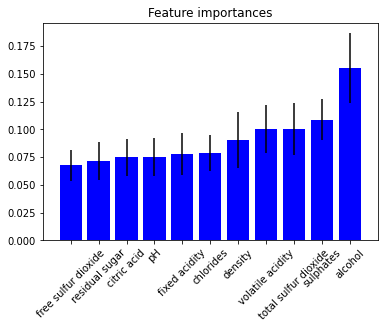

In [135]:
import matplotlib.pyplot as plt

for f in range(X_train.shape[1]):
    print(f"{f+1}.feature --- {X_train.columns[indices][f]}({importances[indices[f]]:.3f})")

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]),importances[indices],color='b',yerr=std[indices],align='center')
plt.xticks(range(X_train.shape[1]),X_train.columns[indices],rotation=45)
plt.xlim([-1,X_train.shape[1]])
plt.show()

Acc: 0.6625
1.feature --- free sulfur dioxide(0.065)
2.feature --- residual sugar(0.072)
3.feature --- citric acid(0.073)
4.feature --- pH(0.074)
5.feature --- fixed acidity(0.077)
6.feature --- chlorides(0.081)
7.feature --- density(0.090)
8.feature --- volatile acidity(0.100)
9.feature --- total sulfur dioxide(0.104)
10.feature --- sulphates(0.114)
11.feature --- alcohol(0.150)


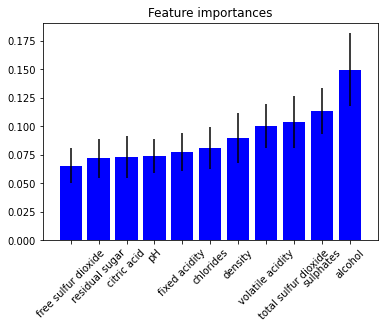

In [146]:
base_model.fit(scle_X_train,y_train)
y_pred = base_model.predict(scale_X_test)
print("Acc:",acc(y_test,y_pred))

importances = base_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in base_model.estimators_],axis=0)
indices = np.argsort(importances)

import matplotlib.pyplot as plt

for f in range(X_train.shape[1]):
    print(f"{f+1}.feature --- {X_train.columns[indices][f]}({importances[indices[f]]:.3f})")

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]),importances[indices],color='b',yerr=std[indices],align='center')
plt.xticks(range(X_train.shape[1]),X_train.columns[indices],rotation=45)
plt.xlim([-1,X_train.shape[1]])
plt.show()


In [158]:
from sklearn.model_selection import RandomizedSearchCV

# 간단한 hyperparameter tuning
random_grid = {'n_estimators': [x for x in range(100,2000,200)],
               'max_features': ['auto','sqrt'],
               'max_depth': [x for x in range(10,100,10)],
               'min_samples_split': [x for x in range(2,12,4)],
               'min_samples_leaf': [x for x in range(1,5)],
               'bootstrap': [True,False],
               }

cv = RandomizedSearchCV(base_model,random_grid,n_jobs=-1, random_state=42, return_train_score=True,cv=5)
cv.fit(scle_X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [100, 300, 500, 700,
                                                         900, 1100, 1300, 1500,
                                                         1700, 1900]},
                   random_state=42, return_train_score=True)

In [113]:
# not scale
cv.best_score_ # 0.6912101715686274


0.6912101715686274

In [148]:
# sclaed
cv.best_score_

0.6959037990196079

In [149]:
cv.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1100}

In [159]:
import joblib

joblib.dump(cv.best_estimator_, 'qulity_model.pkl', compress = 1)

['qulity_model.pkl']